In [1]:
import osmnx as ox
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import math
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [2]:
grouped_dataframes = pd.read_pickle('grouped_dataframes.pkl')

In [ ]:
names = list(grouped_dataframes.keys())
grouped_dataframes[names[5]]j

,Vej-Id,Kilometer,Retning,Spor,Dato,Aarstal,Maened,Dag,Dagtype,Trafiktype,Xkoordinat,Ykoordinat,time_interval,traffic_flow,time_start
datetime,,,,,,,,,,,,,,,
1675206000,0 450-0 7/ 300 -2,7.0,-,2.0,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:00-00:15,6.0,00:00
1675206900,0 450-0 7/ 300 -2,7.0,-,2.0,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:15-00:30,9.0,00:15
1675207800,0 450-0 7/ 300 -2,7.0,-,2.0,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:30-00:45,2.0,00:30
1675208700,0 450-0 7/ 300 -2,7.0,-,2.0,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:45-01:00,0.0,00:45
1675209600,0 450-0 7/ 300 -2,7.0,-,2.0,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,01:00-01:15,1.0,01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704059100,0 450-0 7/ 300 -2,7.0,-,2.0,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,552601.0,6329842.0,22:45-23:00,25.0,22:45
1704060000,0 450-0 7/ 300 -2,7.0,-,2.0,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,552601.0,6329842.0,23:00-23:15,NaN,23:00
1704060900,0 450-0 7/ 300 -2,7.0,-,2.0,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,552601.0,6329842.0,23:15-23:30,NaN,23:15


In [4]:
# filter grouped_dataframes to only include dataframes which name has a "+" "-" or "T" at the end of the name 
names = list(grouped_dataframes.keys())
filtered_dataframes = {}
for name in names:
    single_name = name[0]
    if single_name[-1] in ["T"]:
        filtered_dataframes[name] = grouped_dataframes[name]
        
len(filtered_dataframes)

137

In [5]:
unique_dataframes = dict()
grouped_dataframes = filtered_dataframes
cords = list()
names = (grouped_dataframes.keys()) 
start_date = list()
k = 0
for name in names:
    x,y = grouped_dataframes[name]['Xkoordinat'].iloc[0], grouped_dataframes[name]['Xkoordinat'].iloc[0]
    if (x,y) not in cords:
        unique_dataframes[name] = grouped_dataframes[name]
        print("Unique Dataframes", k)
        k += 1
        cords.append((x,y))
        start_date.append((grouped_dataframes[name].index[0],grouped_dataframes[name].index[1],len(grouped_dataframes[name])))

grouped_dataframes = unique_dataframes
        

Unique Dataframes 0
Unique Dataframes 1
Unique Dataframes 2
Unique Dataframes 3
Unique Dataframes 4
Unique Dataframes 5
Unique Dataframes 6
Unique Dataframes 7
Unique Dataframes 8
Unique Dataframes 9
Unique Dataframes 10
Unique Dataframes 11
Unique Dataframes 12
Unique Dataframes 13
Unique Dataframes 14
Unique Dataframes 15
Unique Dataframes 16
Unique Dataframes 17
Unique Dataframes 18
Unique Dataframes 19
Unique Dataframes 20
Unique Dataframes 21
Unique Dataframes 22
Unique Dataframes 23
Unique Dataframes 24
Unique Dataframes 25
Unique Dataframes 26
Unique Dataframes 27
Unique Dataframes 28
Unique Dataframes 29
Unique Dataframes 30
Unique Dataframes 31
Unique Dataframes 32
Unique Dataframes 33
Unique Dataframes 34
Unique Dataframes 35
Unique Dataframes 36
Unique Dataframes 37
Unique Dataframes 38
Unique Dataframes 39
Unique Dataframes 40
Unique Dataframes 41
Unique Dataframes 42
Unique Dataframes 43
Unique Dataframes 44
Unique Dataframes 45
Unique Dataframes 46
Unique Dataframes 47
Un

In [6]:
import math

def find_closest_unconnected_nodes(grouped_dataframes):
    closest = dict()
    cleaned_dataframes = {}
    names = list(grouped_dataframes.keys())
    for i, name in enumerate(names):
        print(f"{i}/{len(names)}")
        df = grouped_dataframes[name]
        cleaned_dataframes[i] = df[['traffic_flow', 'Xkoordinat', 'Ykoordinat']].copy()
        x1 = df['Xkoordinat'].iloc[0]# + np.random-randint(-3000,3000)
        y1 = df['Ykoordinat'].iloc[0]# + np.random-randint(-3000,3000)
        
        for j, other_name in enumerate(names):
            if j != i:
                df2 = grouped_dataframes[other_name]
                x2, y2 = df2['Xkoordinat'].iloc[0], df2['Ykoordinat'].iloc[0]
                closest[j] = euclidean_distance(x1, y1, x2, y2)
        
        for k in range(0,30,1):
            cleaned_dataframes[i][f'closest_edge_{k}'] = None
            smallest_edge = min(closest, key=closest.get)
            cleaned_dataframes[i][f'closest_edge_{k}'] = smallest_edge
            closest.pop(smallest_edge)

    
    return cleaned_dataframes

cleaned_dataframes = find_closest_unconnected_nodes(grouped_dataframes)

0/136
1/136
2/136
3/136
4/136
5/136
6/136
7/136
8/136
9/136
10/136
11/136
12/136
13/136
14/136
15/136
16/136
17/136
18/136
19/136
20/136
21/136
22/136
23/136
24/136
25/136
26/136
27/136
28/136
29/136
30/136
31/136
32/136
33/136
34/136
35/136
36/136
37/136
38/136
39/136
40/136
41/136
42/136
43/136
44/136
45/136
46/136
47/136
48/136
49/136
50/136
51/136
52/136
53/136
54/136
55/136
56/136
57/136
58/136
59/136
60/136
61/136
62/136
63/136
64/136
65/136
66/136
67/136
68/136
69/136
70/136
71/136
72/136
73/136
74/136
75/136
76/136
77/136
78/136
79/136
80/136
81/136
82/136
83/136
84/136
85/136
86/136
87/136
88/136
89/136
90/136
91/136
92/136
93/136
94/136
95/136
96/136
97/136
98/136
99/136
100/136
101/136
102/136
103/136
104/136
105/136
106/136
107/136
108/136
109/136
110/136
111/136
112/136
113/136
114/136
115/136
116/136
117/136
118/136
119/136
120/136
121/136
122/136
123/136
124/136
125/136
126/136
127/136
128/136
129/136
130/136
131/136
132/136
133/136
134/136
135/136


In [ ]:
# from datetime import datetime
# import time
# def find_longest_common_period(dataframes_dict):
#     """
#     This function finds the longest common date range across a dictionary of dataframes, 
#     where each dataframe's index is a datetime object representing the time series.
    
#     Parameters:
#     dataframes_dict (dict): A dictionary of DataFrames where each DataFrame has a datetime index.

#     Returns:
#     tuple: Start and end date of the longest common period.
#     """
#     # Initialize the start and end dates to the extreme opposites
#     max_start_date = timestamp = time.mktime(time.strptime('1970-10-20 22:24:46', '%Y-%m-%d %H:%M:%S'))
#     min_end_date = timestamp = time.mktime(time.strptime('2025-10-20 22:24:46', '%Y-%m-%d %H:%M:%S'))

#     # Loop through each DataFrame to find the latest start date and earliest end date
#     for df in dataframes_dict.values():
#         # Get the start and end dates of each DataFrame
#         df_start_date = df.index.min()
#         df_end_date = df.index.max()

#         # Update the max of start dates and min of end dates
#         max_start_date = max(max_start_date, df_start_date)
#         min_end_date = min(min_end_date, df_end_date)
#         print(max_start_date, min_end_date)
#     # Check if there's a valid common period
#     if max_start_date <= min_end_date:
#         return max_start_date, min_end_date
#     else:
#         return None  # No overlapping period found

# find_longest_common_period(cleaned_dataframes)

In [7]:
def create_15min_interval_index(start_date, end_date):
    # Convert start_date and end_date to milliseconds
    current_time = int(start_date.timestamp())
    end_time = int(end_date.timestamp())
    
    # Interval in milliseconds (15 minutes = 900000 ms)
    interval = 900

    # List to hold each timestamp in milliseconds
    time_index_ms = []

    # Loop to generate timestamps at 15-minute intervals
    while current_time <= end_time:
        time_index_ms.append(current_time)
        current_time += interval

    return pd.Index(time_index_ms)

# Determine the earliest start date and latest end date across all DataFrames
start_date = min(df.index.min() for df in grouped_dataframes.values() if df.index.notna().all())
end_date = max(df.index.max() for df in grouped_dataframes.values() if df.index.notna().all())

start_date = pd.Timestamp("2022-01-01 00:00:00")
end_date = pd.Timestamp("2024-01-01 00:00:00")

time_index_ms = create_15min_interval_index(start_date, end_date)

everything_df = pd.DataFrame(index=time_index_ms, columns=range(0,65,1))

In [8]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [9]:
for i, name in enumerate(cleaned_dataframes):
    print(i, len(cleaned_dataframes))
    
    df = cleaned_dataframes[name]['traffic_flow']
    df_grouped = df.groupby(df.index).sum()
    
    # Create a temporary DataFrame with the grouped data
    temp_df = pd.DataFrame({name: df_grouped})
    
    # Update 'everything_df' with 'temp_df' without chained assignment
    everything_df.update(temp_df)


0 136
1 136
2 136
3 136
4 136
5 136
6 136
7 136
8 136
9 136
10 136
11 136
12 136
13 136
14 136
15 136
16 136
17 136
18 136
19 136
20 136
21 136
22 136
23 136
24 136
25 136
26 136
27 136
28 136
29 136
30 136
31 136
32 136
33 136
34 136
35 136
36 136
37 136
38 136
39 136
40 136
41 136
42 136
43 136
44 136
45 136
46 136
47 136
48 136
49 136
50 136
51 136
52 136
53 136
54 136
55 136
56 136
57 136
58 136
59 136
60 136
61 136
62 136
63 136
64 136
65 136
66 136
67 136
68 136
69 136
70 136
71 136
72 136
73 136
74 136
75 136
76 136
77 136
78 136
79 136
80 136
81 136
82 136
83 136
84 136
85 136
86 136
87 136
88 136
89 136
90 136
91 136
92 136
93 136
94 136
95 136
96 136
97 136
98 136
99 136
100 136
101 136
102 136
103 136
104 136
105 136
106 136
107 136
108 136
109 136
110 136
111 136
112 136
113 136
114 136
115 136
116 136
117 136
118 136
119 136
120 136
121 136
122 136
123 136
124 136
125 136
126 136
127 136
128 136
129 136
130 136
131 136
132 136
133 136
134 136
135 136


In [10]:
pd.set_option('display.max_rows', None)
print(everything_df.notna().sum())

0     34652
1     35041
2     31489
3     31489
4     31484
5     35041
6     35041
7     29756
8     29761
9     34753
10    34945
11    34945
12    34945
13    33889
14    34945
15    34945
16    29377
17    34940
18    33889
19    34945
20    34940
21    34945
22    34849
23    21509
24    21509
25    33889
26    31489
27    35041
28    30044
29    34561
30    34561
31    33889
32    34945
33    34561
34    31489
35    35041
36    34753
37    35041
38    34945
39    31489
40    35041
41    34753
42    35041
43    34849
44    31489
45    35041
46    30049
47    29953
48    33889
49        5
50        5
51        5
52    33889
53        5
54        5
55    33697
56    35036
57    35041
58    35041
59    24581
60    34945
61    34945
62    34945
63    34945
64    34945
dtype: int64


In [11]:
# Collect data without inserting directly into everything_df
for i, name in enumerate(cleaned_dataframes):
    print("DataFrames: ", i, "Total: ", len(cleaned_dataframes))
    df = cleaned_dataframes[name]['traffic_flow']

    for j, traffic_flow in enumerate(df):
        idx = df.index[j]
        #print("DF: ",name,idx)
        everything_df.loc[idx, name] = traffic_flow

        if j%10000==0:
            print(j, len(df))

DataFrames:  0 Total:  136
0 34656
10000 34656
20000 34656
30000 34656
DataFrames:  1 Total:  136
0 61344
10000 61344
20000 61344
30000 61344
40000 61344
50000 61344
60000 61344
DataFrames:  2 Total:  136
0 53664
10000 53664
20000 53664
30000 53664
40000 53664
50000 53664
DataFrames:  3 Total:  136
0 53760
10000 53760
20000 53760
30000 53760
40000 53760
50000 53760
DataFrames:  4 Total:  136
0 31488
10000 31488
20000 31488
30000 31488
DataFrames:  5 Total:  136
0 61152
10000 61152
20000 61152
30000 61152
40000 61152
50000 61152
60000 61152
DataFrames:  6 Total:  136
0 61152
10000 61152
20000 61152
30000 61152
40000 61152
50000 61152
60000 61152
DataFrames:  7 Total:  136
0 29760
10000 29760
20000 29760
DataFrames:  8 Total:  136
0 55776
10000 55776
20000 55776
30000 55776
40000 55776
50000 55776
DataFrames:  9 Total:  136
0 60000
10000 60000
20000 60000
30000 60000
40000 60000
50000 60000
DataFrames:  10 Total:  136
0 39648
10000 39648
20000 39648
30000 39648
DataFrames:  11 Total:  13

In [13]:
everything_df.to_csv('everything_df.csv')

In [12]:
pd.set_option('display.max_rows', None)
print(everything_df.notna().sum())

0      33529
1      56629
2      48804
3      49039
4      30367
5      56443
6      56443
7      28587
8      50944
9      55088
10     38292
11     54543
12     47336
13     54990
14     56224
15     56224
16     41420
17     33810
18     53277
19     56327
20     33810
21     56073
22     56105
23     43426
24     43426
25     55043
26     49021
27     56629
28     29045
29     54937
30     54937
31     46286
32     55924
33     54937
34     49353
35     56536
36     54012
37     56629
38     56099
39     49353
40     56536
41     38056
42     56629
43     56191
44     49256
45     56629
46     51640
47     50387
48     47355
49     22680
50     22680
51     22688
52     55293
53     22688
54     22688
55     55294
56     33941
57     56629
58     56629
59     46452
60     56248
61     54271
62     54360
63     56216
64     54267
65     54457
66     47984
67     47976
68     47984
69     55243
70     55243
71     54908
72     49945
73     49961
74     49961
75     56540
76     53786

In [ ]:
# total_dataframes = len(cleaned_dataframes)
# for i, name in enumerate(cleaned_dataframes):
#     print(f"Processing {i+1}/{total_dataframes}: {name}")
#     df = cleaned_dataframes[name]['traffic_flow']

#     # Remove duplicates
#     df_no_duplicates = df.groupby(df.index).last()

#     # Align indices
#     common_indices = df_no_duplicates.index.intersection(everything_df.index)
#     df_filtered = df_no_duplicates.loc[common_indices]

#     # Assign values
#     everything_df.loc[common_indices, name] = df_filtered.values

#     # Optional: Progress update
#     if (i + 1) % 10 == 0 or (i + 1) == total_dataframes:
#         print(f"Completed {i + 1}/{total_dataframes} dataframes.")

# print("Data updating complete.")


Processing 1/112: 0
Processing 2/112: 1
Processing 3/112: 5
Processing 4/112: 6
Processing 5/112: 7
Processing 6/112: 10
Processing 7/112: 11
Processing 8/112: 12
Processing 9/112: 13
Processing 10/112: 14
Completed 10/112 dataframes.
Processing 11/112: 15
Processing 12/112: 16
Processing 13/112: 17
Processing 14/112: 18
Processing 15/112: 19
Processing 16/112: 20
Processing 17/112: 21
Processing 18/112: 22
Processing 19/112: 24
Processing 20/112: 25
Completed 20/112 dataframes.
Processing 21/112: 29
Processing 22/112: 30
Processing 23/112: 31
Processing 24/112: 33
Processing 25/112: 34
Processing 26/112: 35
Processing 27/112: 36
Processing 28/112: 37
Processing 29/112: 38
Processing 30/112: 39
Completed 30/112 dataframes.
Processing 31/112: 40
Processing 32/112: 41
Processing 33/112: 42
Processing 34/112: 44
Processing 35/112: 51
Processing 36/112: 53
Processing 37/112: 54
Processing 38/112: 56
Processing 39/112: 57
Processing 40/112: 58
Completed 40/112 dataframes.
Processing 41/112:

In [14]:
pd.set_option('display.max_rows', 500)
print(everything_df.isna().sum())

0      59967
1      36867
2      44692
3      44457
4      63129
5      37053
6      37053
7      64909
8      42552
9      38408
10     55204
11     38953
12     46160
13     38506
14     37272
15     37272
16     52076
17     59686
18     40219
19     37169
20     59686
21     37423
22     37391
23     50070
24     50070
25     38453
26     44475
27     36867
28     64451
29     38559
30     38559
31     47210
32     37572
33     38559
34     44143
35     36960
36     39484
37     36867
38     37397
39     44143
40     36960
41     55440
42     36867
43     37305
44     44240
45     36867
46     41856
47     43109
48     46141
49     70816
50     70816
51     70808
52     38203
53     70808
54     70808
55     38202
56     59555
57     36867
58     36867
59     47044
60     37248
61     39225
62     39136
63     37280
64     39229
65     39039
66     45512
67     45520
68     45512
69     38253
70     38253
71     38588
72     43551
73     43535
74     43535
75     36956
76     39710

In [70]:
def find_longest_non_nan_period(df, threshold=None, tolerance=0, axis=0):
    """
    Finds the longest continuous period in a DataFrame where there are no NaN values in most rows or columns,
    with tolerance for short gaps.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    threshold (float): The minimum proportion of non-NaN values in each row or column (e.g., 0.8 for 80%).
                       If None, defaults to 50% (more than half of the elements in the row/column).
    tolerance (int): The maximum number of consecutive invalid rows or columns that are tolerated as part of the period.
    axis (int): The axis to analyze. 0 for rows (default), 1 for columns.

    Returns:
    pd.DataFrame: Cropped DataFrame to the longest continuous period with minimal NaN values.
    """
    # Set default threshold to more than half of the elements if not specified
    if threshold is None:
        threshold = 0.5

    # Calculate the required number of non-NaN values per row or column
    required_non_nan = int(len(df.columns if axis == 0 else df.index) * threshold)

    # Create a boolean mask where each row or column has True if it meets the non-NaN requirement
    valid = (df.notna().sum(axis=1-axis) >= required_non_nan)

    # Variables to track the longest valid period
    max_start = max_end = temp_start = temp_length = max_length = 0
    gap_count = 0  # Count of consecutive invalid rows or columns within tolerance

    for i, is_valid in enumerate(valid):
        if is_valid:
            if temp_length == 0:
                temp_start = i  # Start a new period
            temp_length += 1
            gap_count = 0  # Reset gap count as we are in a valid row/column
        else:
            if gap_count < tolerance:
                gap_count += 1  # Increase gap count but keep period going
                temp_length += 1
            else:
                # End of current period due to excessive gap
                if temp_length > max_length:
                    max_start, max_end = temp_start, temp_start + temp_length
                    max_length = temp_length
                # Reset for a new period
                temp_length = 0
                gap_count = 0

    # Final check in case the longest period ends at the last row/column
    if temp_length > max_length:
        max_start, max_end = temp_start, temp_start + temp_length

    # Crop the DataFrame to the longest continuous non-NaN period
    if axis == 0:  # Rows
        return df.iloc[max_start:max_end]
    else:  # Columns
        return df.iloc[:, max_start:max_end]

# Analyze rows (axis=0, default) or columns (axis=1)
better = find_longest_non_nan_period(everything_df, threshold=0.80, tolerance=20, axis=1)

In [71]:
better.dropna(axis=0, how='all', inplace=True)
better = better.bfill(inplace=False)
#better.fillna(0, inplace=True)

C:\Users\gonde\AppData\Local\Temp\ipykernel_19948\1341583080.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  better = better.bfill(inplace=False)


In [72]:
better.isna().sum()
better = better.drop(columns=[0,4,7,17], axis=1)

In [73]:
def find_longest_repeating_values(df):
    """
    Checks each column in the DataFrame for the longest repeating value sequence.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    None
    """
    for column in df.columns:
        longest_value = None
        longest_count = 0
        current_value = None
        current_count = 0

        # Loop through the values in the column
        for value in df[column]:
            if value == current_value:
                current_count += 1
            else:
                if current_count > longest_count:
                    longest_value = current_value
                    longest_count = current_count
                current_value = value
                current_count = 1

        # Final check in case the longest sequence ends at the last row
        if current_count > longest_count:
            longest_value = current_value
            longest_count = current_count

        # Print the results for this column
        print(f"Column: {column}, Longest Repeating Value: {longest_value}, Count: {longest_count}")


def find_columns_with_repeating_values(df, threshold):
    """
    Checks each column in the DataFrame for repeating value sequences longer than the specified threshold.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    threshold (int): The minimum length of the repeating value sequence to consider.

    Returns:
    list: A list of column names that have repeating value sequences longer than the threshold.
    """
    columns_with_repeating_values = []

    for column in df.columns:
        longest_count = 0
        current_value = None
        current_count = 0

        # Loop through the values in the column
        for value in df[column]:
            if value == current_value:
                current_count += 1
            else:
                if current_count > longest_count:
                    longest_count = current_count
                current_value = value
                current_count = 1

        # Final check in case the longest sequence ends at the last row
        if current_count > longest_count:
            longest_count = current_count

        # Check if the longest repeating sequence is longer than the threshold
        if longest_count > threshold:
            columns_with_repeating_values.append(column)

    return columns_with_repeating_values
    
def filter_dict_and_dataframe_by_keys(data_dict, df):
    """
    Filters a dictionary and a DataFrame to only keep dictionary entries 
    where the keys match the column names of the DataFrame, and vice versa.

    Parameters:
    data_dict (dict): The dictionary to filter.
    df (pd.DataFrame): The DataFrame to filter.

    Returns:
    tuple: (filtered_dict, filtered_df)
    """
    # Find common keys between the dictionary and DataFrame columns
    common_keys = set(data_dict.keys()).intersection(set(df.columns))
    
    # Filter the dictionary to only keep entries with matching keys
    filtered_dict = {key: value for key, value in data_dict.items() if key in common_keys}
    
    # Filter the DataFrame to only keep columns with matching keys (convert set to list)
    filtered_df = df.loc[:, list(common_keys)]

    return filtered_dict, filtered_df



# Example Usage
threshold = 100

# Step 1: Identify columns to remove based on repeating values
remove_columns = find_columns_with_repeating_values(better, threshold)

# Step 2: Drop those columns from the DataFrame
better = better.drop(columns=remove_columns)

# Debug print
print(f"Columns removed: {remove_columns}")

# Step 3: Filter dictionary and DataFrame to keep only common keys
cleaned_dataframes, better = filter_dict_and_dataframe_by_keys(cleaned_dataframes, better)

# Debug print to verify the final filtered DataFrame
print(f"Remaining columns in DataFrame: {better.columns}")
print(f"Remaining keys in dictionary: {list(cleaned_dataframes.keys())}")

Columns removed: [2, 3, 8, 9, 10, 12, 13, 14, 15, 16, 18]
Remaining columns in DataFrame: Index([1, 5, 6, 11, 19], dtype='int64')
Remaining keys in dictionary: [1, 5, 6, 11, 19]


In [83]:
better[700:800]

,1,5,6,11,19
1673176500,199.0,601.000,470.000,657.000,906.000
1673177400,225.0,627.000,480.000,633.000,981.000
1673178300,220.0,632.000,490.000,650.000,921.000
1673179200,206.0,575.000,454.000,666.000,920.000
1673180100,248.0,615.000,485.000,683.000,941.000
1673181000,266.0,627.000,492.000,673.000,1.018
1673181900,238.0,712.000,560.000,723.000,1.016
1673182800,242.0,659.000,521.000,672.000,957.000
1673183700,195.0,666.000,542.000,781.000,1.091
1673184600,248.0,670.000,533.000,701.000,1.037


Text(0.5, 0, 'Time')

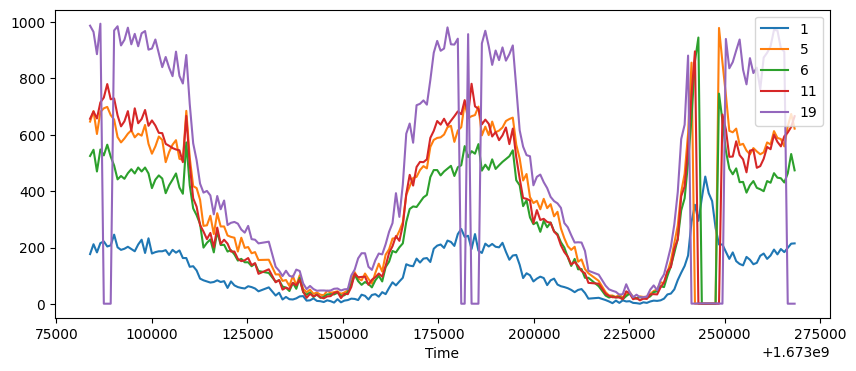

In [82]:
# plot values in everything_df
plt.figure(figsize=(10, 4))
plt.plot(better[600:800])
plt.legend(better.columns)
plt.xlabel('Time')

In [ ]:
b

Graph

In [54]:
print(list(cleaned_dataframes.keys()) == list(better.columns), len(better.columns))

True 5


In [58]:
# Initialize the graph
graph = nx.Graph()

names = list(cleaned_dataframes.keys())

# Add nodes and edges to the graph
for k,i in enumerate(names):
    print(k,i)
    idx = cleaned_dataframes[i].first_valid_index()
    
    # Add node with attributes
    graph.add_node(
        k,
        x=cleaned_dataframes[i]['Xkoordinat'][idx],
        y=cleaned_dataframes[i]['Ykoordinat'][idx],
        traffic=better[i].values
    )
    print(i,j,cleaned_dataframes[i]['Xkoordinat'][idx],cleaned_dataframes[i]['Ykoordinat'][idx],better[i].values[0])
    for l in range(0,20,1):
        # Get the ID of the closest edge and add an edge between nodes
        closest_node = cleaned_dataframes[i][f'closest_edge_{l}'].iloc[0]
        print(i,closest_node)
        graph.add_edge(i, closest_node)  # Add edge by node indices (i, closest_node)
        #graph.add_edge(i, np.random.randint(484))  # Add edge by node indices (i, closest_node)


0 1
1 61343 549360.0 6330576.0 8.0
1 0
1 100
1 115
1 107
1 101
1 110
1 113
1 102
1 135
1 99
1 108
1 59
1 95
1 111
1 56
1 22
1 38
1 21
1 32
1 105
1 5
5 61343 555132.0 6317792.0 32.0
5 27
5 6
5 40
5 45
5 35
5 24
5 23
5 7
5 28
5 46
5 129
5 8
5 125
5 132
5 131
5 9
5 29
5 30
5 33
5 47
2 6
6 61343 555308.0 6318304.0 26.0
6 40
6 45
6 27
6 35
6 5
6 7
6 28
6 46
6 8
6 125
6 129
6 24
6 23
6 131
6 132
6 9
6 29
6 30
6 33
6 47
3 11
11 61343 559007.0 6321227.0 29.0
11 10
11 12
11 36
11 41
11 47
11 133
11 31
11 48
11 33
11 30
11 29
11 13
11 9
11 42
11 37
11 14
11 25
11 15
11 55
11 50
4 19
19 61343 557594.0 6324700.0 52.0
19 20
19 58
19 57
19 18
19 56
19 17
19 16
19 38
19 32
19 43
19 21
19 135
19 52
19 53
19 49
19 22
19 54
19 51
19 55
19 50


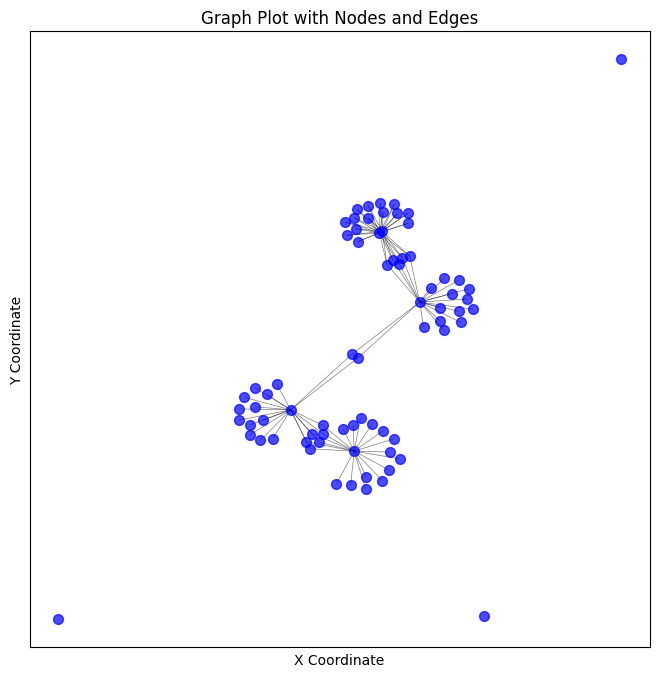

In [59]:

# Define the positions of the nodes using their 'x' and 'y' attributes
pos = nx.spring_layout(graph, seed=1337)  # Use a fixed seed for reproducibility


# Plot the graph
plt.figure(figsize=(8, 8))

# Draw nodes with custom size
nx.draw_networkx_nodes(graph, pos, node_size=50, node_color="blue", alpha=0.7)

# Draw edges with custom width
nx.draw_networkx_edges(graph, pos, width=0.5, edge_color="black", alpha=0.5)

# Optionally, draw labels for each node if you want to see the node IDs or specific data
# Uncomment the following line if you'd like to see labels (e.g., traffic values or node IDs)
# nx.draw_networkx_labels(graph, pos, labels={node: node for node in graph.nodes()}, font_size=8)

# Set plot labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Graph Plot with Nodes and Edges")

# Show the plot
plt.show()

In [60]:
import pickle

pickle.dump(graph, open('graph_more_quality_5.pkl', 'wb'))

In [61]:
nx.GraphMLWriter(graph, 'graph_more_quality_5.graphml')

NetworkXError: GraphML writer does not support <class 'numpy.ndarray'> as data values.

In [ ]:
def clean_graph(graph):
    # Remove self-loops
    self_loops = list(nx.selfloop_edges(graph))
    graph.remove_edges_from(self_loops)
    
    # Remove duplicate edges (not necessary for undirected graphs in NetworkX)
    # Here just in case your graph is directed or you need further verification
    edges_to_remove = []
    for u, v, data in graph.edges(data=True):
        if graph.number_of_edges(u, v) > 1:  # More than one edge exists
            edges_to_remove.append((u, v))
    
    graph.remove_edges_from(edges_to_remove)
    
    print(f"Removed {len(self_loops)} self-loops and {len(edges_to_remove)} duplicate edges.")
    return graph

graph = clean_graph(graph)

Removed 4 self-loops and 0 duplicate edges.


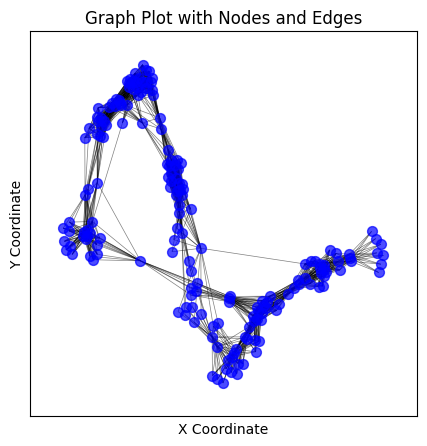

In [ ]:
# extract largest component
largest_component = max(nx.connected_components(graph), key=len)
subgraph = graph.subgraph(largest_component)
# Plot the graph
plt.figure(figsize=(5, 5))

# Draw nodes with custom size
nx.draw_networkx_nodes(subgraph, pos, node_size=50, node_color="blue", alpha=0.7)

# Draw edges with custom width
nx.draw_networkx_edges(subgraph, pos, width=0.5, edge_color="black", alpha=0.5)

# Optionally, draw labels for each node if you want to see the node IDs or specific data
# Uncomment the following line if you'd like to see labels (e.g., traffic values or node IDs)
# nx.draw_networkx_labels(graph, pos, labels={node: node for node in graph.nodes()}, font_size=8)

# Set plot labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Graph Plot with Nodes and Edges")

# Show the plot
plt.show()

Model things

In [ ]:
nodes = list(subgraph.nodes(data=True))
nodes[2]

(144, {})

In [ ]:
graph.nodes(data=True)

NodeDataView({0: {'x': 552601.0, 'y': 6329842.0, 'traffic': array([28., 17.,  8., ..., 18., 13., 15.])}, 1: {'x': 549360.0, 'y': 6330576.0, 'traffic': array([22., 18.,  5., ..., 13., 12.,  9.])}, 144: {}, 159: {}, 151: {}, 145: {}, 154: {}, 157: {}, 143: {}, 152: {}, 139: {}, 155: {}, 97: {'x': 556968.0, 'y': 6333118.0, 'traffic': array([2., 0., 1., ..., 1., 3., 2.])}, 146: {}, 99: {'x': 558085.0, 'y': 6339351.0, 'traffic': array([3., 3., 2., ..., 1., 3., 2.])}, 98: {'x': 558086.0, 'y': 6339075.0, 'traffic': array([2., 0., 4., ..., 4., 0., 0.])}, 42: {'x': 558963.0, 'y': 6321350.0, 'traffic': array([12., 12., 12., ..., nan, nan, nan])}, 149: {}, 41: {'x': 558342.0, 'y': 6320192.0, 'traffic': array([ 6.,  4.,  4., ..., nan, nan, nan])}, 100: {'x': 577191.0, 'y': 6313881.0, 'traffic': array([1., 1., 0., ..., 1., 0., 1.])}, 147: {}, 179: {}, 91: {'x': 556242.0, 'y': 6340624.0, 'traffic': array([2., 0., 0., ..., 2., 0., 0.])}, 40: {'x': 555588.0, 'y': 6318742.0, 'traffic': array([15., 16.,

In [ ]:
for _, data in graph.nodes(data=True):
    print(data['x'])

552601.0
549360.0


KeyError: 'x'

In [ ]:
from torch_geometric.data import Data
import torch
import numpy as np

# Assuming `graph` is your NetworkX graph
x_coords = [data['x'] for _, data in graph.nodes(data=True)]
y_coords = [data['y'] for _, data in graph.nodes(data=True)]
traffic_series = [data['traffic'] for _, data in graph.nodes(data=True)]

# Convert the traffic data list to a 2D numpy array
traffic_series = np.stack(traffic_series)

# Stack x, y, and traffic data into a single feature array
node_features = np.column_stack((x_coords, y_coords, traffic_series))

# Convert to PyTorch tensor
node_features = torch.tensor(node_features, dtype=torch.float)

# Add edges
edge_index = torch.tensor(list(graph.edges)).T  # List of edges converted to tensor

# Create PyTorch Geometric Data object
data = Data(x=node_features, edge_index=edge_index)


KeyError: 'x'

In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class TrafficGNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)


    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x


In [ ]:
model = TrafficGNN(in_channels=node_features.size(1), hidden_channels=32, out_channels=1)

In [ ]:
len(traffic_series[0])

56629

In [ ]:
from torch.optim import Adam

optimizer = Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

# Here, traffic_series has shape [num_nodes, T], so we take the last value as the target
target_values = traffic_series[:, -1]  # For example, predicting the last timestep in each series

# Convert target values to a PyTorch tensor
target = torch.tensor(target_values, dtype=torch.float).view(-1, 1)  # Shape [num_nodes, 1]

model.train()
for epoch in range(30000):
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out, target)  # Using the defined `target` tensor
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 864869056.0
Epoch 1, Loss: 60979548160.0
Epoch 2, Loss: 10367258624.0
Epoch 3, Loss: 12088481.0
Epoch 4, Loss: 4549.0009765625
Epoch 5, Loss: 4548.5615234375
Epoch 6, Loss: 4548.18359375
Epoch 7, Loss: 4547.85302734375
Epoch 8, Loss: 4547.5615234375
Epoch 9, Loss: 4547.3037109375
Epoch 10, Loss: 4547.07275390625
Epoch 11, Loss: 4546.865234375
Epoch 12, Loss: 4546.6796875
Epoch 13, Loss: 4546.51123046875
Epoch 14, Loss: 4546.35986328125
Epoch 15, Loss: 4546.22216796875
Epoch 16, Loss: 4546.09716796875
Epoch 17, Loss: 4545.984375
Epoch 18, Loss: 4545.8818359375
Epoch 19, Loss: 4545.7880859375
Epoch 20, Loss: 4545.70263671875
Epoch 21, Loss: 4545.62451171875
Epoch 22, Loss: 4545.55517578125
Epoch 23, Loss: 4545.4912109375
Epoch 24, Loss: 4545.431640625
Epoch 25, Loss: 4545.3779296875
Epoch 26, Loss: 4545.32958984375
Epoch 27, Loss: 4545.2841796875
Epoch 28, Loss: 4545.244140625
Epoch 29, Loss: 4545.20654296875
Epoch 30, Loss: 4545.17236328125
Epoch 31, Loss: 4545.1420898437

KeyboardInterrupt: 